<a href="https://colab.research.google.com/github/yeoauqt/229352/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [1]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [3]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [4]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

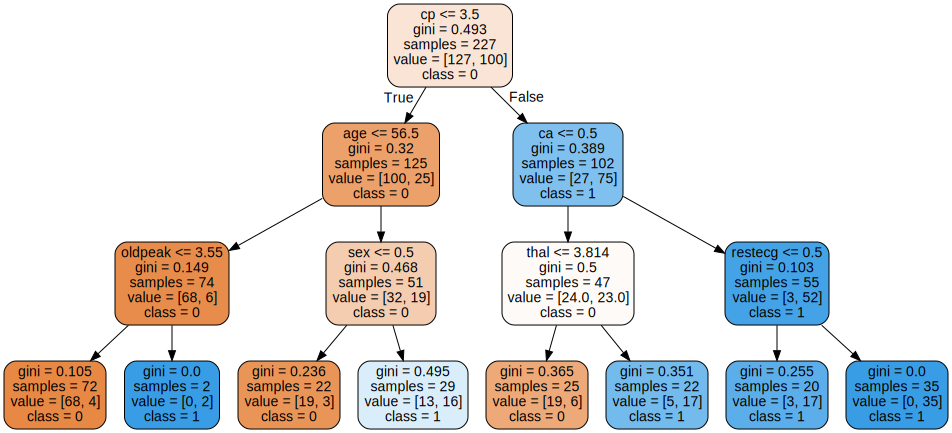

In [5]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [6]:
from sklearn.metrics import classification_report

ypred = gridcv.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.79      0.87      0.83        39

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [7]:
clf = DecisionTreeClassifier()

bagged_trees = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5)
bagged_trees.fit(X_train, y_train)

ypred_bt = bagged_trees.predict(X_test)
print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.84      0.82      0.83        39

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [8]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

ypred_rf = rf.predict(X_test)
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.86      0.82      0.84        39

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [9]:
clf = DecisionTreeClassifier()

params_dt = {'criterion': ['gini', 'entropy'],
             'max_depth': [3, 6, 9, 12],
             'min_samples_split': [2, 3, 5, 10]}

gridcv_dt = GridSearchCV(clf, params_dt, scoring='accuracy', cv=5)
gridcv_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='accuracy')

In [10]:
ypred_dt = gridcv_dt.predict(X_test)
print(classification_report(y_test, ypred_dt))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77        37
           1       0.81      0.67      0.73        39

    accuracy                           0.75        76
   macro avg       0.76      0.75      0.75        76
weighted avg       0.76      0.75      0.75        76



In [13]:
bt = BaggingClassifier()

params_bt = {'n_estimators': [50, 100, 200, 250],
             'max_samples': [0.3, 0.5, 0.8, 1.0],
             'max_features': [4, 5, 6, 7]}

gridcv_bt = GridSearchCV(bt, params_bt, scoring='accuracy', cv=5)
gridcv_bt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [4, 5, 6, 7],
                         'max_samples': [0.3, 0.5, 0.8, 1.0],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy')

In [14]:
ypred_bt = gridcv_bt.predict(X_test)
print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        37
           1       0.81      0.77      0.79        39

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [18]:
rf = RandomForestClassifier()

params_rf = {'n_estimators': [50, 100, 200, 250],
             'criterion': ['gini', 'entropy'],
             'max_depth': [3, 6, 9, 12]}

gridcv_rf = GridSearchCV(rf, params_rf, scoring='accuracy', cv=5)
gridcv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy')

In [19]:
ypred_rf = gridcv_rf.predict(X_test)
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        37
           1       0.91      0.79      0.85        39

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.85        76



โมเดลที่ดีที่สุด คือ random forest โดยมีค่า accuracy = 0.86 และ f1_macro = 0.86

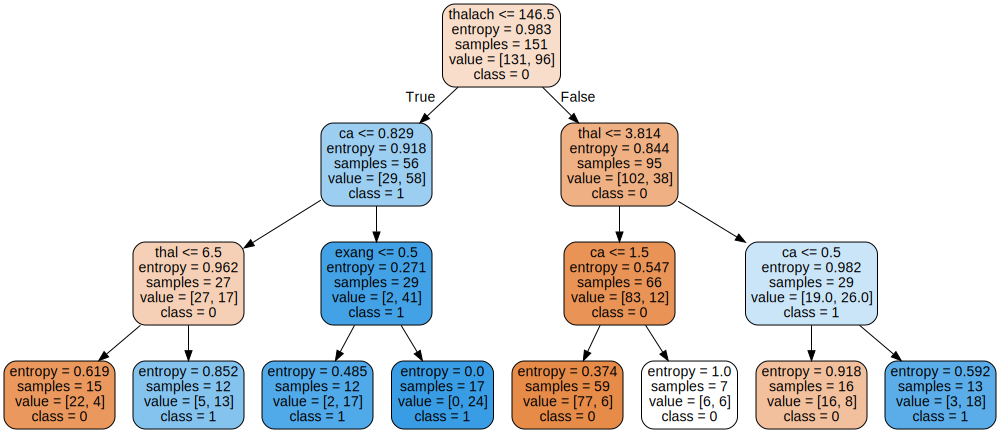

In [21]:
plot_data = export_graphviz(gridcv_rf.best_estimator_[0],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

What hyperparameters did you choose?
- n_estimators จำนวนต้นไม้ เพื่อช่วยลดโอกาสที่จะทำนายผิดจากต้นไม้ใดต้นไม้หนึ่ง
- criterion เกณฑ์การตัดสินใจในการแบ่งกิ่งไม้แต่ละครั้ง เพื่อให้ได้ข้อสรุปที่แม่นยำ
- max_depth ระดับความลึก เพื่อกำหนดขอบเขตความซับซ้อน ป้องกันการเกิด overfitting

What are the best values of your hyperparameters?
- criterion='entropy', max_depth=3, n_estimators=200